In [2]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline


iris = datasets.load_iris()
X = iris.data #Choosing only the first two input-features
Y = iris.target

number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]






model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)









DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [3]:



validation_set_predictions = [model.predict(x_val[i].reshape((1,len(x_val[i]))))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print ('validation misclassification percentage =', validation_misclassification_percentage, '%'


)
test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print ('test misclassification percentage =', test_misclassification_percentage, '%'

)

validation misclassification percentage = 9.090909090909092 %
test misclassification percentage = 4.545454545454546 %


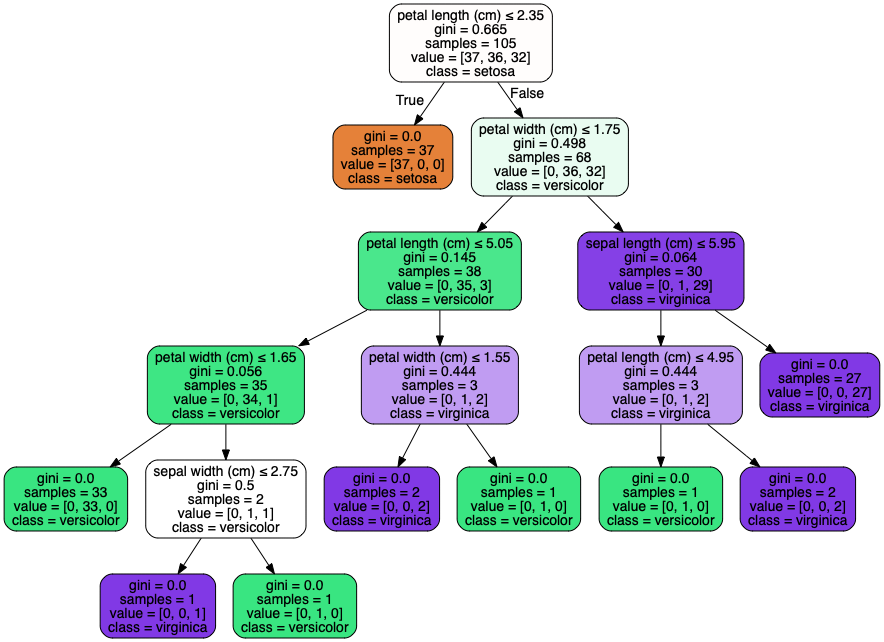

In [7]:
from __future__ import print_function

from sklearn.externals.six import StringIO
import pydot
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue()) 

Image(graph.create_png())
